In [1]:
import gspread as gs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
sa = gs.service_account(filename="enhanced-victor-363219-68e4353f5f23.json")
sheet = sa.open("Untitled form (Responses)")
work_sheet = sheet.worksheet("Form Responses 1")
df = pd.DataFrame(work_sheet.get_all_records())
df.head()

Timestamp sessionID a score b score time elapse  \
0                                                   
1                                                   
2                                                   
3                                                   
4                                                   

  who caused death, 0 for left player, 1 for right, -1 none death reason  \
0                                                                          
1                                                                          
2                                                                          
3                                                                          
4                                                                          

  level true for pass level, false for died arrive check point time array  \
0                                                                           
1                                                                           
2                                                                           
3                                                                           
4                                                                           

  coin get time array  
0                      
1                      
2                      
3                      
4

In [3]:
df['sessionID'].unique()

array(['', 637993323282263457, 637993323716735352, 637993325496660845,
       637993328050186794, 637993328438416579, 637993329096890637,
       637993334216644963, 637993334807891489, 637993341267985941,
       637993341639432594, 637993341747778854, 637995311724573512,
       637995311807681453, 637995311961578312, 637995320437621281,
       637995320532657010, 637995325680341447, 637995415402054991,
       637995452009913878, 637995462894481413, 637995463135260554,
       637995463230278253, 637995465764246146, 637995479003123367,
       637995479697651105, 637995482192127525, 637995500321987205,
       637995509689490508, 637995510966189424, 637995511205260894,
       637995832714511504, 637995832787434584, 637995832837723143,
       637995832937507080, 637995832966107640, 637996268949434633,
       637996269704015794, 637996273907630820, 637996274952903689,
       637996275186348067, 637996275294024211, 637996297569977589,
       637996303236421614, 637996304392078166, 63799642834

In [4]:
df['time elapse'] = pd.to_numeric(df['time elapse'])
df['a score'] = pd.to_numeric(df['a score'])
df['b score'] = pd.to_numeric(df['b score'])
df=df[df['time elapse'] <= 600]
df1 = df.dropna()
df1

Timestamp             sessionID  a score  b score  time elapse  \
23     9/21/2022 4:49:24    637993325496660845      0.0      0.0         14.0   
24     9/21/2022 4:53:44    637993328050186794      0.0      0.0         18.0   
25     9/21/2022 4:54:08    637993328438416579      0.0      0.0          4.0   
26     9/21/2022 4:55:31    637993329096890637      3.0      0.0         21.0   
27     9/21/2022 5:03:50    637993334216644963      0.0      0.0          8.0   
..                   ...                   ...      ...      ...          ...   
717  10/18/2022 13:25:36  638017000000000000.0      1.0      1.0         18.0   
718  10/18/2022 13:27:14  638017000000000000.0      3.0      3.0         23.0   
719  10/18/2022 13:27:55  638017000000000000.0      3.0      3.0         39.0   
720  10/18/2022 13:35:51  638017000000000000.0      3.0      3.0         44.0   
721  10/18/2022 13:36:34  638017000000000000.0      3.0      3.0         40.0   

    who caused death, 0 for left player, 1 for right, -1 none  \
23                                                              
24                                                              
25                                                              
26                                                              
27                                                              
..                                                 ...          
717                                                  1          
718                                                 -1          
719                                                 -1          
720                                                 -1          
721                                                 -1          

              death reason     level true for pass level, false for died  \
23                                                                         
24                                                                         
25                                                                         
26                                                                         
27                                                                         
..                     ...       ...                                 ...   
717  Touch different Color    Level0                               FALSE   
718                           Level0                                TRUE   
719                         Level0.1                                TRUE   
720                           Level0                                TRUE   
721                         Level0.1                                TRUE   

    arrive check point time array coin get time array  
23                                                     
24                                                     
25                                                     
26                                                     
27                                                     
..                            ...                 ...  
717                             0       9160000000000  
718                             0   81518182121000000  
719                  142300000000   91021192831000000  
720                             0  273438394241000000  
721                  101800000000   71016162825000000  

[697 rows x 11 columns]

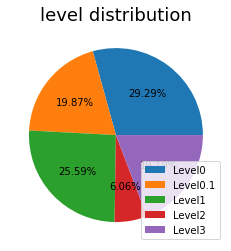

In [5]:
level=df1[df1['level']!='']
df2 = level.groupby(['level']).size()
plt.title("level distribution",fontsize=18)
patches, text1, text2 = plt.pie(df2, autopct=lambda p: '{:.2f}%'.format(p,(p/100)*df2.sum()))
plt.legend(patches, df2.index, loc="lower right")
plt.show()

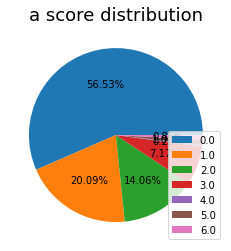

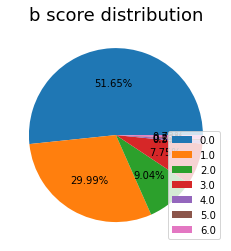

In [6]:
    for i in (['a score', 'b score']):
        #level = df1[df1['level']==j]
        df2 = df1.groupby([i]).size()
        plt.title(i + " distribution",fontsize=18)
        patches, text1, text2 = plt.pie(df2, autopct=lambda p: '{:.2f}%'.format(p,(p/100)*df2.sum()))
        plt.legend(patches, df2.index, loc="lower right")
        plt.show()

Text(0.5, 1.0, 'Survival Time for Each Player')

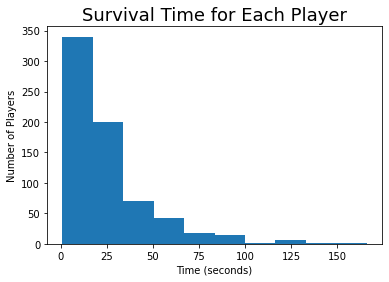

In [7]:
plt.hist(df1['time elapse'])
plt.xlabel("Time (seconds)")
plt.ylabel("Number of Players")
plt.title("Survival Time for Each Player",fontsize=18)

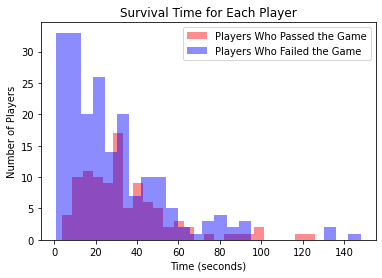

In [8]:
# plotting two histograms on the same axis
passed=df1[df1['true for pass level, false for died'] == 'TRUE']
notPassed=df1[df1['true for pass level, false for died'] == 'FALSE']
plt.hist(passed['time elapse'], bins=25, alpha=0.45, color='red')
plt.hist(notPassed['time elapse'], bins=25, alpha=0.45, color='blue')
  
plt.title("Survival Time for Each Player")
  
plt.legend(['Players Who Passed the Game', 
            'Players Who Failed the Game'])
plt.xlabel("Time (seconds)")
plt.ylabel("Number of Players")  
plt.show()

<AxesSubplot:title={'center':'Reasons of Termination'}, ylabel='level'>

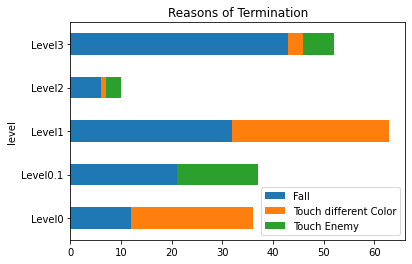

In [9]:
data=[]
for j in (['Level0', 'Level0.1', 'Level1', 'Level2', 'Level3']):
    level = df1[df1['level']==j]
    df3 = level[level['death reason'] != '']
    df4 = df3.groupby(['death reason']).size()
    dictionary=df4.to_dict()
    dictionary['level']=j
    data.append(dictionary)
deathReason = pd.DataFrame(data)
deathReason.plot(
    x = 'level',
    kind = 'barh',
    stacked = True,
    title = 'Reasons of Termination', #stacked bar chart
    mark_right = True)

In [10]:
deathReason.set_index('level')

Fall  Touch different Color  Touch Enemy
level                                             
Level0      12                   24.0          NaN
Level0.1    21                    NaN         16.0
Level1      32                   31.0          NaN
Level2       6                    1.0          3.0
Level3      43                    3.0          6.0

C:\Users\lucyg\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


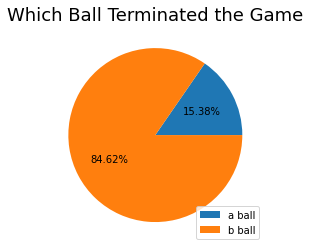

In [11]:
whoCausedDeath = df3['who caused death, 0 for left player, 1 for right, -1 none'].map({1: 'b ball', 0: 'a ball', -1: 'none'})
df3["who caused death, 0 for left player, 1 for right, -1 none"] = whoCausedDeath
df5 = df3.groupby(['who caused death, 0 for left player, 1 for right, -1 none']).size()
plt.title("Which Ball Terminated the Game",fontsize=18)
patches, text1, text2 = plt.pie(df5, autopct=lambda p: '{:.2f}%'.format(p,(p/100)*df5.sum()))
plt.legend(patches, df5.index, loc="lower right")
plt.show()

<AxesSubplot:title={'center':'Pass Rate'}, ylabel='level'>

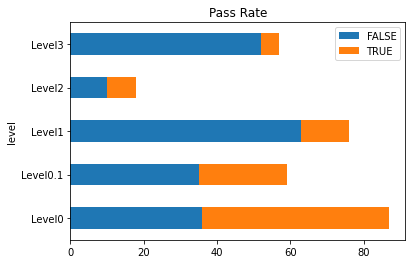

In [12]:
data=[]
for j in (['Level0', 'Level0.1', 'Level1', 'Level2', 'Level3']):
    level=df1[df1['level']==j]
    df2 = level.groupby(['true for pass level, false for died']).size()
    dictionary=df2.to_dict()
    dictionary['level']=j
    data.append(dictionary)
    
passRate = pd.DataFrame(data)
passRate.plot(
    x = 'level',
    kind = 'barh',
    stacked = True,
    title = 'Pass Rate', #stacked bar chart
    mark_right = True)